In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sofware.data_collector import get_stock_data
from sofware.data_processor import process_data
from sofware.tasks import run_back_test, plot_drawdown, plot_equity_curve
import mplfinance as mpf

%matplotlib inline
sns.set_style('darkgrid')

In [16]:
start_date = "2024-10-11 09:30:00"
end_date = "2024-10-11 16:00:00"
period = "1d"
ticker = "MSFT"
interval = "1m"
initial_cash = 1000

In [17]:
data = get_stock_data(ticker=ticker, period=period, save_to_csv=True, interval=interval)
print(data)

Data saved to data/raw/MSFT_1d.csv
                                 Open        High         Low       Close  \
Datetime                                                                    
2024-10-11 09:30:00-04:00  415.910004  416.000000  414.174988  414.679993   
2024-10-11 09:31:00-04:00  414.470001  414.890015  414.150391  414.269989   
2024-10-11 09:32:00-04:00  414.260010  414.880005  414.209991  414.339996   
2024-10-11 09:33:00-04:00  414.355591  414.519989  413.950012  414.410004   
2024-10-11 09:34:00-04:00  414.341309  414.399994  414.079987  414.220001   
...                               ...         ...         ...         ...   
2024-10-11 15:55:00-04:00  416.290009  416.320007  415.900085  416.119995   
2024-10-11 15:56:00-04:00  416.109985  416.230011  415.929993  416.190002   
2024-10-11 15:57:00-04:00  416.200012  416.505005  416.140015  416.404999   
2024-10-11 15:58:00-04:00  416.399994  416.489990  416.239990  416.350006   
2024-10-11 15:59:00-04:00  416.334991  41

In [18]:
data = process_data(data, period, interval)

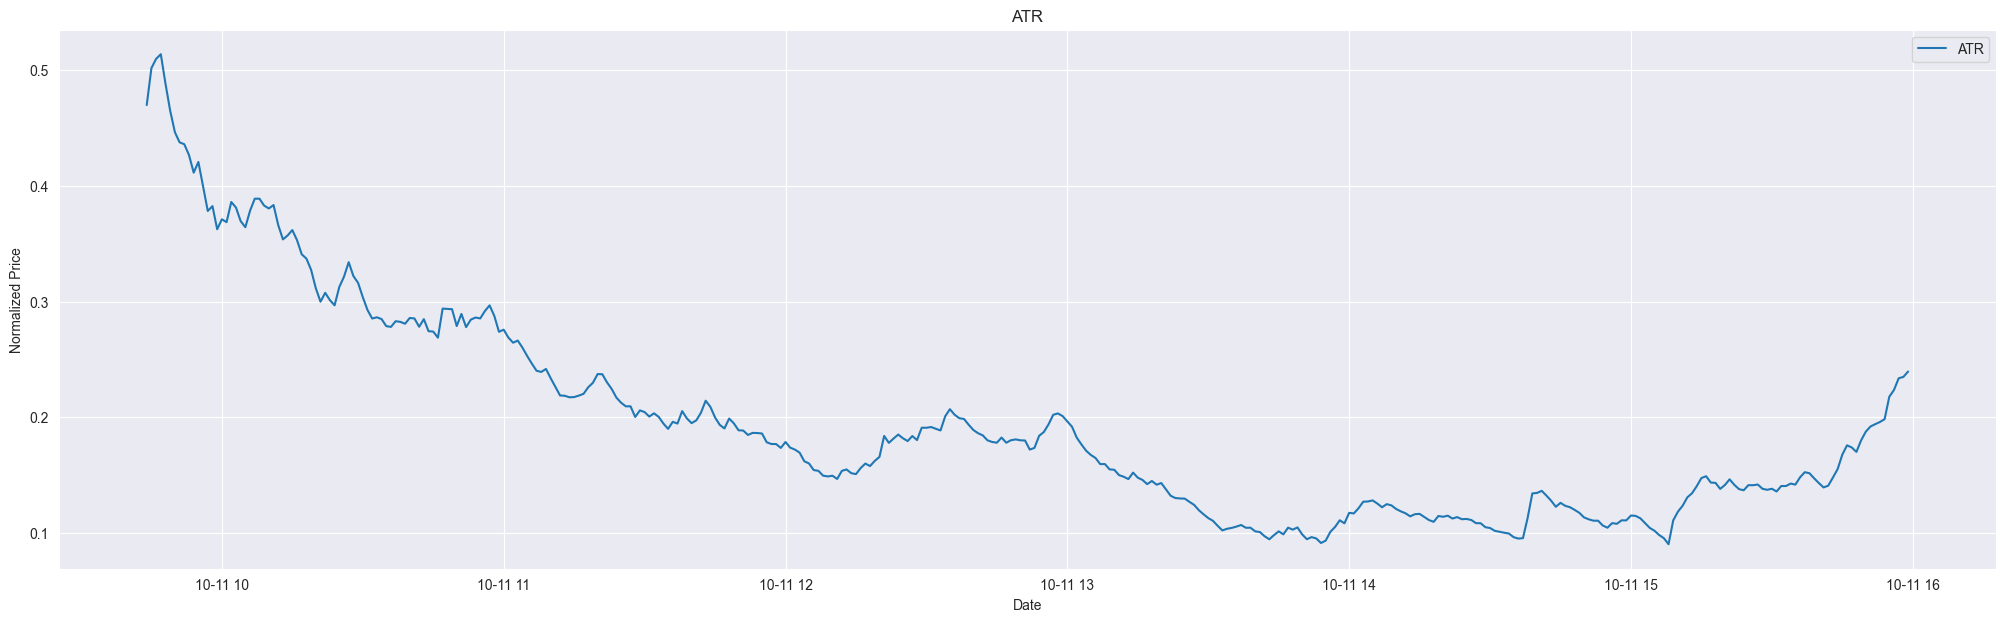

In [19]:
plt.figure(figsize=(25, 7))
plt.plot(data["ATR"], label="ATR")
plt.title("ATR")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

This represent the Close Price of the stock market. The task is to visualize the basic stock data.

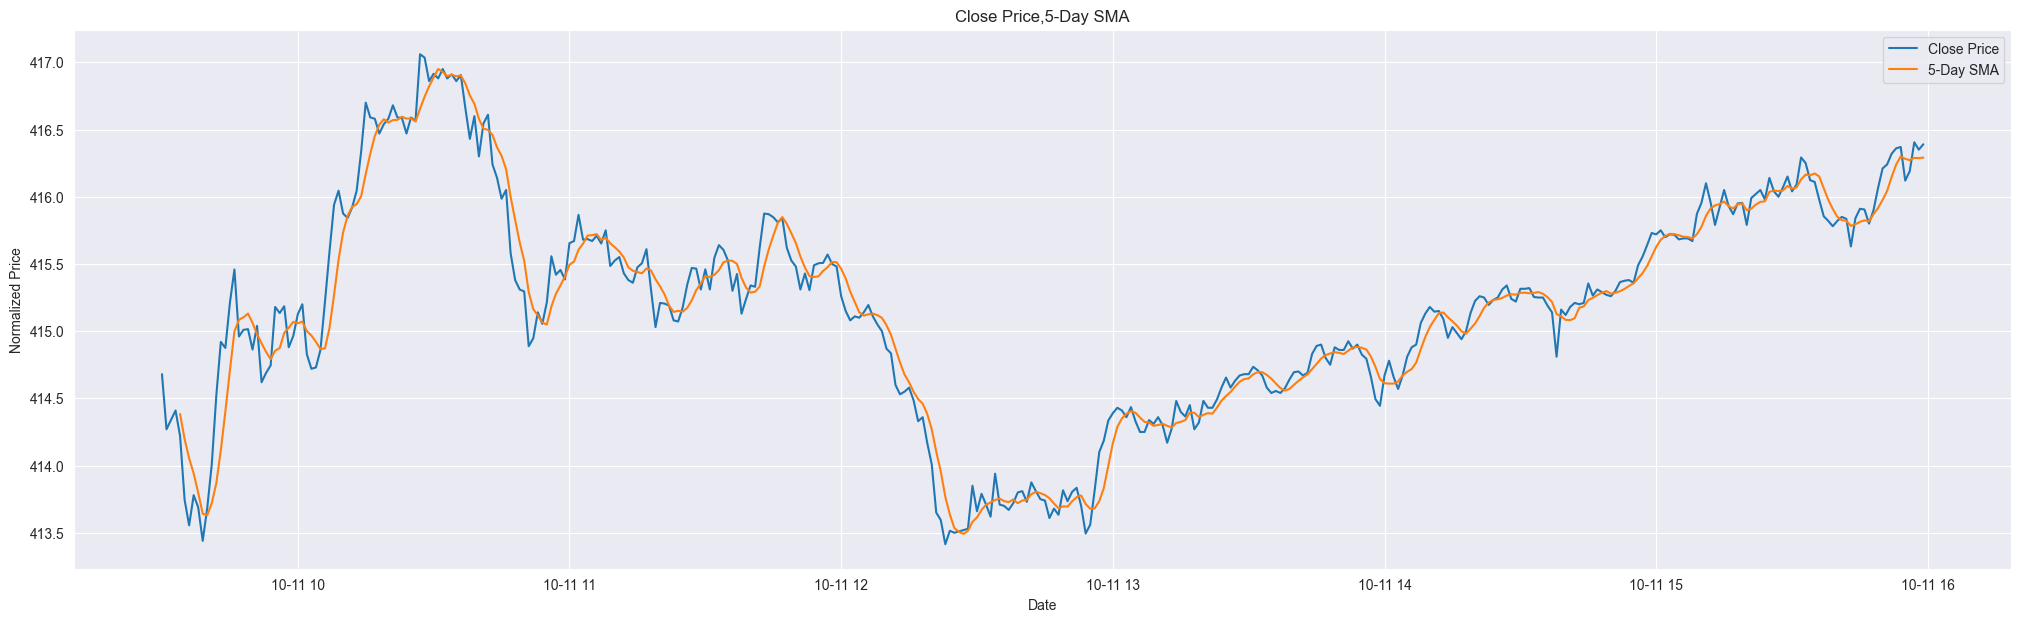

In [20]:
# Plot SMA
plt.figure(figsize=(25, 7))

plt.plot(data["Close"], label="Close Price")
plt.plot(data["SMA_5"], label="5-Day SMA")

plt.title("Close Price,5-Day SMA")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

The SMA (Simple Moving Average) is a technical indicator that shows the average price of a stock over a period of time. The SMA is calculated by adding the closing prices of the stock for a period of time and then dividing by the number of days in that period. The SMA is used to identify trends in the stock market and to help traders make decisions about when to buy or sell a stock.

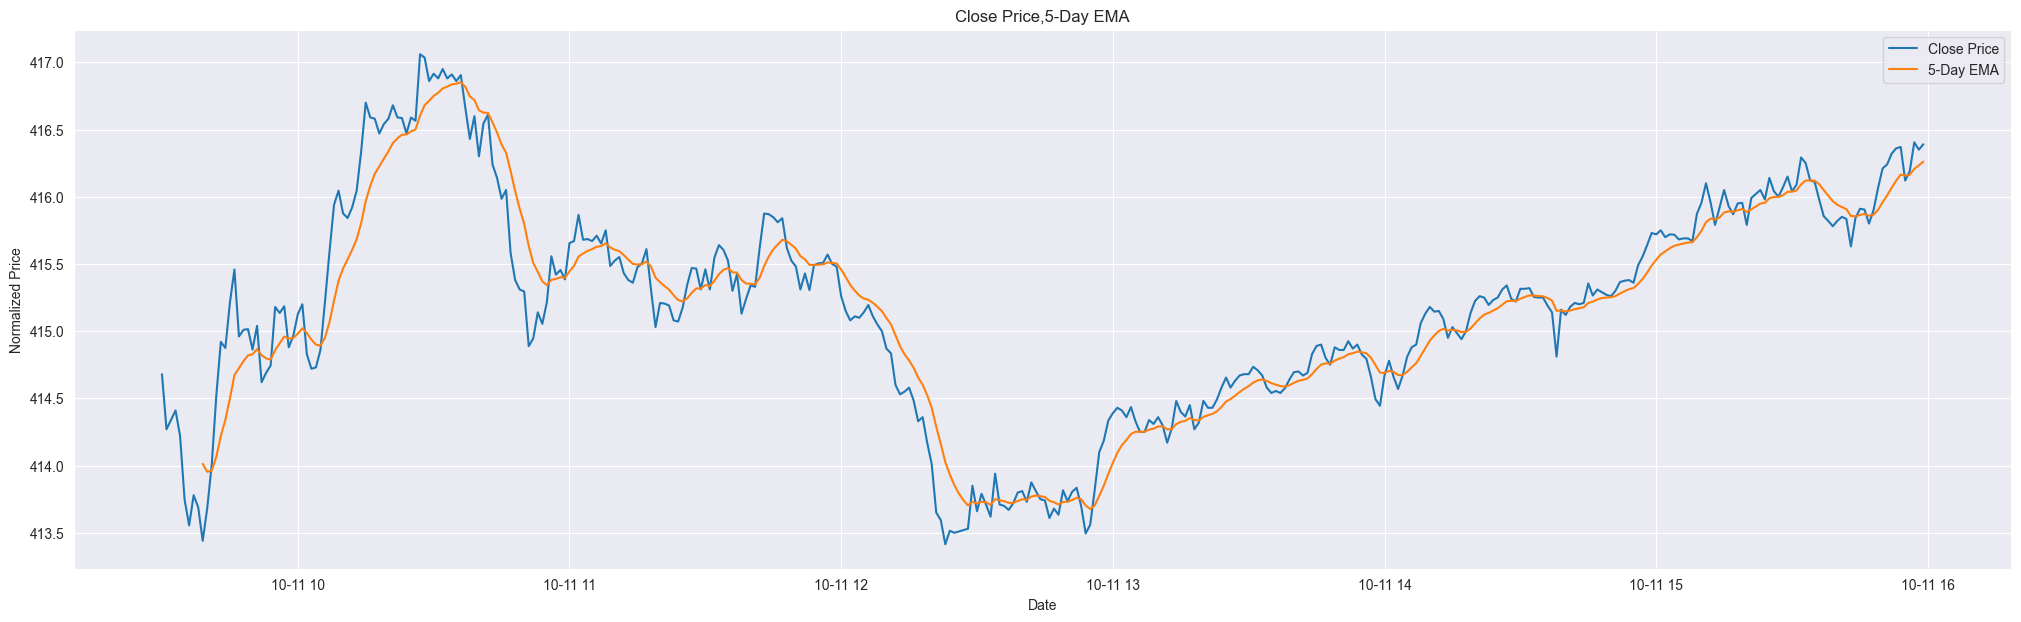

In [21]:
# Plot EMA
plt.figure(figsize=(25, 7))

plt.plot(data["Close"], label="Close Price")
plt.plot(data["EMA"], label="5-Day EMA")

plt.title("Close Price,5-Day EMA")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

The EMA (Exponential Moving Average) is a technical indicator that is similar to the SMA, but it gives more weight to the most recent prices. The EMA is calculated by taking the closing prices of the stock for a period of time and then multiplying them by a weight factor that decreases over time. The EMA is used to identify trends in the stock market and to help traders make decisions about when to buy or sell a stock.

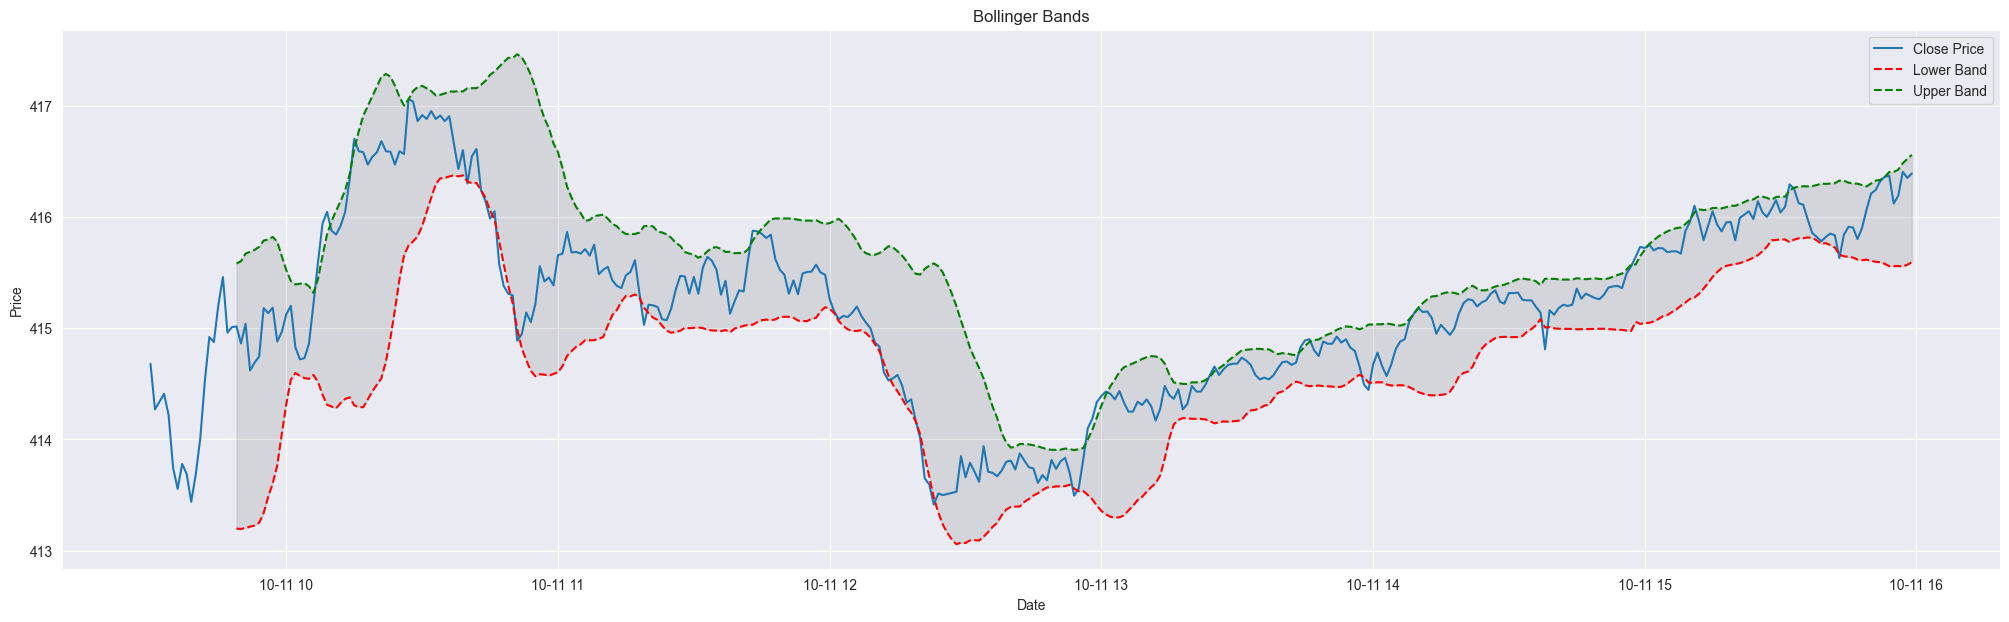

In [22]:
# Bollinger Bands
plt.figure(figsize=(25, 7))

plt.fill_between(
    data.index,
    data["BollingerB_Lower"],
    data["BollingerB_Upper"],
    color="gray",
    alpha=0.2, 
)
plt.plot(data["Close"], label="Close Price")
plt.plot(data["BollingerB_Lower"], linestyle="--", color="red", label="Lower Band")
plt.plot(data["BollingerB_Upper"], linestyle="--", color="green", label="Upper Band")

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

The Bollinger Bands are a technical indicator that shows the volatility of a stock. The Bollinger Bands are calculated by taking the SMA of the stock and then adding and subtracting a multiple of the standard deviation of the stock. The Bollinger Bands are used to identify when a stock is overbought or oversold and to help traders make decisions about when to buy or sell a stock.

Running back tests for MSFT from 2024-10-11 09:30:00 to 2024-10-11 16:00:00...
Price: 414.7200012207031
Stop_Loss_Pct: 0.0013791975453315579
ATR_Stop_Loss_Dollar: 0.5719808076834945
Equity: 10000.0, Risk Amount: 100.0
Risk Amount: 100.0
ATR_Stop_Loss_Dollar: 0.5719808076834945, Position Size: 174.8310409312457
Total Cost: 72542.14622021247
Margin Required: 72542.14622021247
Cash after opening position: $-0.00
Price: 415.2185974121094
Stop_Loss_Pct: 0.0013674598397651874
ATR_Stop_Loss_Dollar: 0.5677947566846889
Equity: 9997.014445877849, Risk Amount: 99.97014445877849
Risk Amount: 99.97014445877849
ATR_Stop_Loss_Dollar: 0.5677947566846889, Position Size: 176.0673963290832
Total Cost: 73216.1535930232
Margin Required: 73216.1535930232
Cash after opening position: $0.00
Price: 415.9200134277344
Stop_Loss_Pct: 0.001320357373427868
ATR_Stop_Loss_Dollar: 0.5491630564855269
Equity: 9988.897351598076, Risk Amount: 99.88897351598077
Risk Amount: 99.88897351598077
ATR_Stop_Loss_Dollar: 0.5491630

/Users/ju/Works/perso/algo_day_trading/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Cash after opening position: $0.00
Price: 416.29998779296875
Stop_Loss_Pct: 0.0010296728628414683
ATR_Stop_Loss_Dollar: 0.4286528002316545
Equity: 9969.02849158764, Risk Amount: 99.6902849158764
Risk Amount: 99.6902849158764
ATR_Stop_Loss_Dollar: 0.4286528002316545, Position Size: 232.56650805034127
Total Cost: 96962.70902282128
Margin Required: 96962.70902282128
Cash after opening position: $0.00
Price: 416.5450134277344
Stop_Loss_Pct: 0.0010275753530573954
ATR_Stop_Loss_Dollar: 0.42803138923730166
Equity: 9949.988711949456, Risk Amount: 99.49988711949456
Risk Amount: 99.49988711949456
ATR_Stop_Loss_Dollar: 0.42803138923730166, Position Size: 232.4593233612864
Total Cost: 96878.13844202858
Margin Required: 96878.13844202858
Cash after opening position: $0.00
Price: 416.1404113769531
Stop_Loss_Pct: 0.0009888355883222312
ATR_Stop_Loss_Dollar: 0.41149444850858474
Equity: 9925.423448542166, Risk Amount: 99.25423448542166
Risk Amount: 99.25423448542166
ATR_Stop_Loss_Dollar: 0.4114944485085

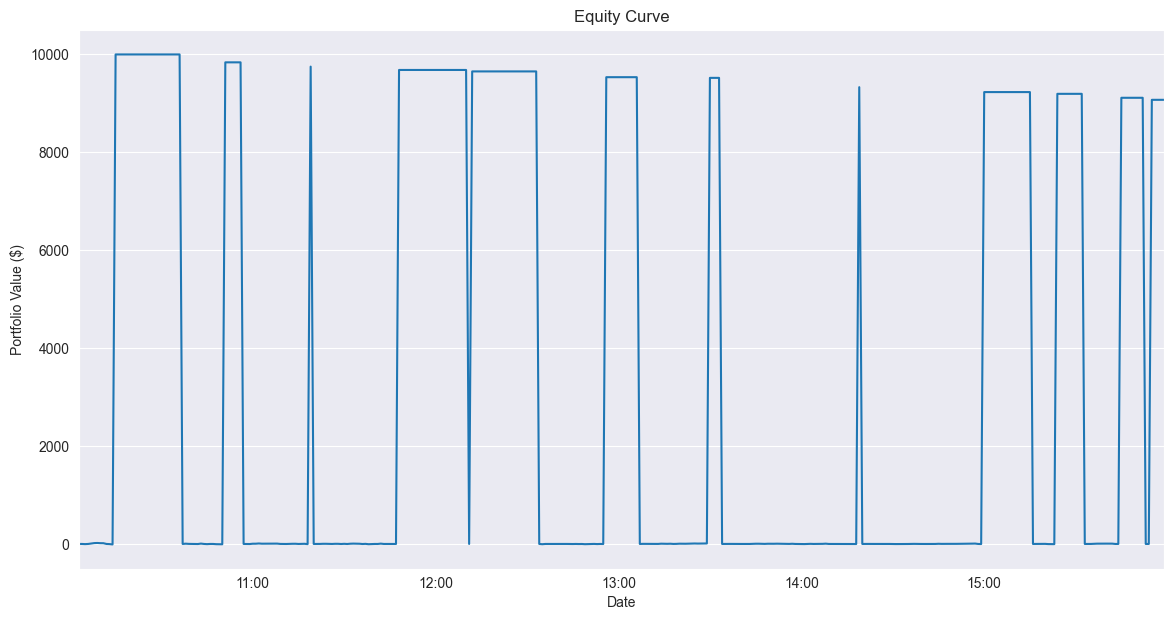

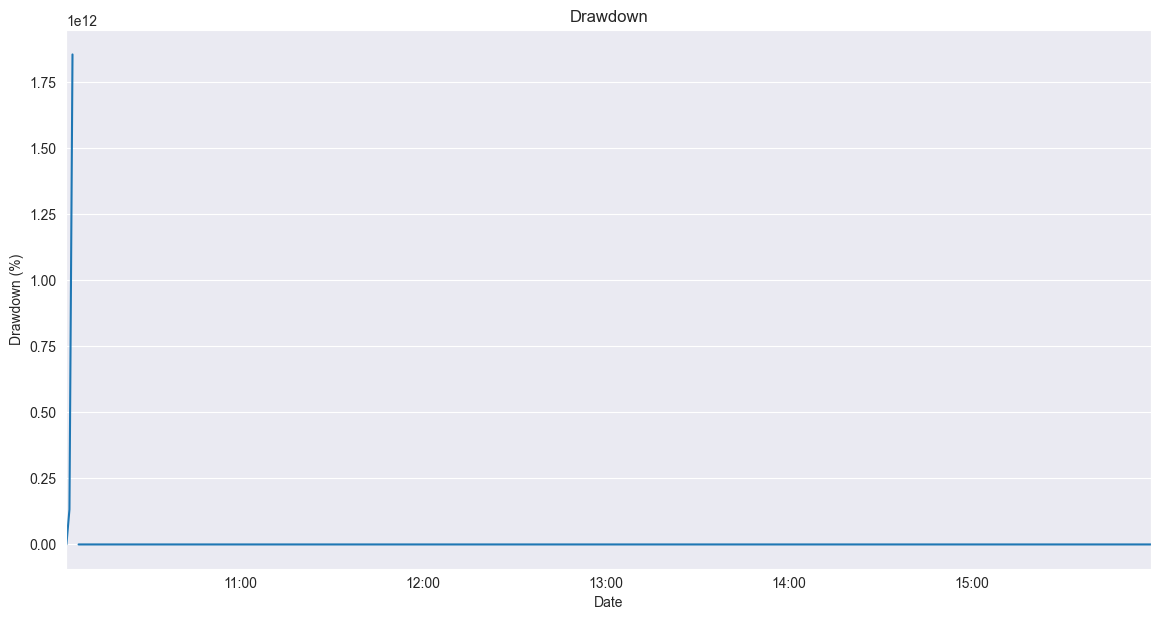

In [23]:
result = run_back_test(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
)

Running back tests for MSFT from 2024-10-11 09:30:00 to 2024-10-11 16:00:00...
Price: 414.7200012207031
Stop_Loss_Pct: 0.0013791975453315579
ATR_Stop_Loss_Dollar: 0.5719808076834945
Equity: 10000.0, Risk Amount: 100.0
Risk Amount: 100.0
ATR_Stop_Loss_Dollar: 0.5719808076834945, Position Size: 174.8310409312457
Total Cost: 72476.92351132317
Margin Required: 72476.92351132317
Cash after opening position: $-0.00
Price: 415.2185974121094
Stop_Loss_Pct: 0.0013674598397651874
ATR_Stop_Loss_Dollar: 0.5677947566846889
Equity: 10015.025283435314, Risk Amount: 100.15025283435314
Risk Amount: 100.15025283435314
ATR_Stop_Loss_Dollar: 0.5677947566846889, Position Size: 176.38460316034437
Total Cost: 73282.11409175566
Margin Required: 73282.11409175566
Cash after opening position: $0.00
Price: 415.9200134277344
Stop_Loss_Pct: 0.001320357373427868
ATR_Stop_Loss_Dollar: 0.5491630564855269
Equity: 10024.922201215493, Risk Amount: 100.24922201215493
Risk Amount: 100.24922201215493
ATR_Stop_Loss_Dollar: 

/Users/ju/Works/perso/algo_day_trading/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


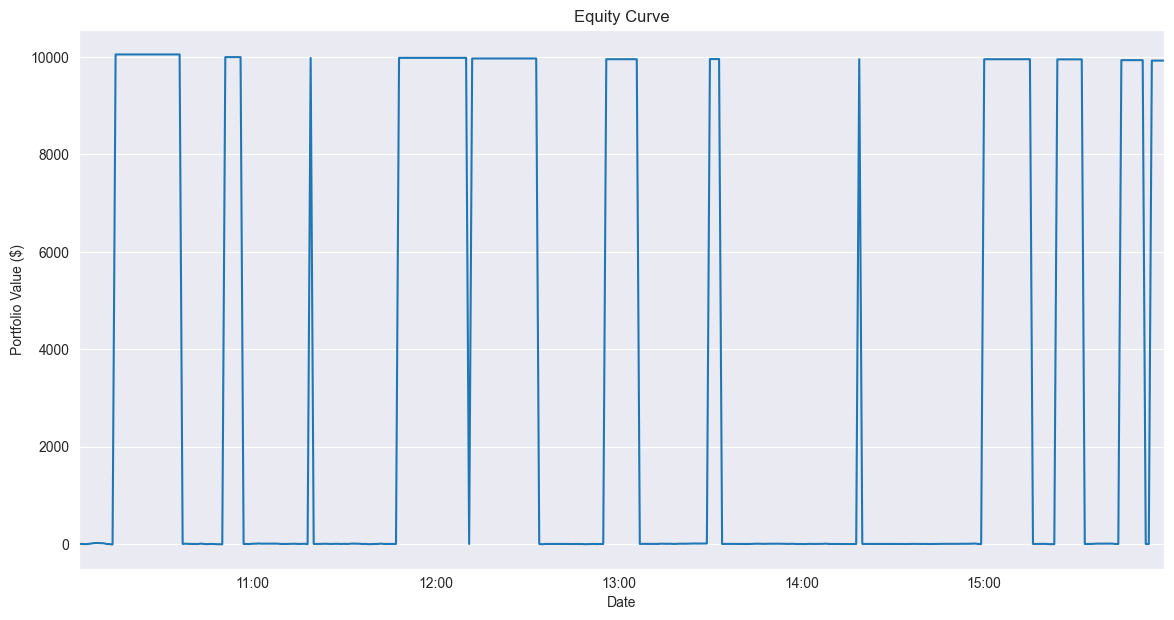

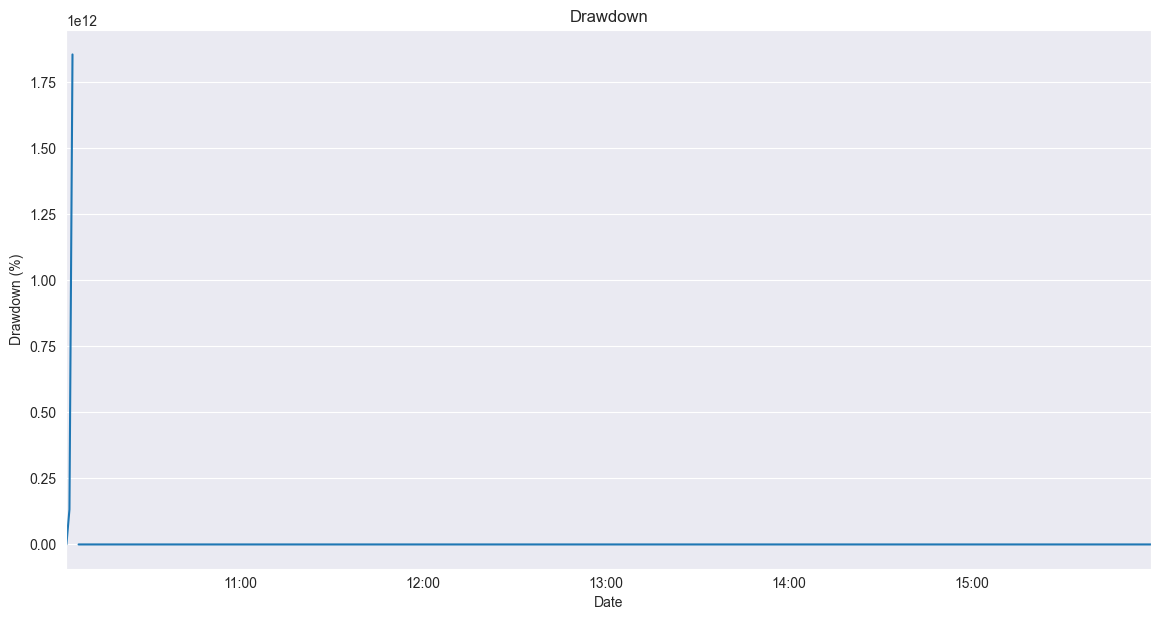

In [27]:
result = run_back_test(
    ticker=ticker,
    start_date=start_date,
    end_date=end_date,
    initial_cash=10000,
    transaction_cost=0.0001,
    leverage=1,
    slippage_pct=0.0005,
    interval=interval,
    atr_period=14,
)